In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from datetime import datetime
import warnings
from sklearn.model_selection import validation_curve


In [2]:
data = pd.read_csv('data/collegePlace.csv')
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
dummy_gender = pd.get_dummies(data["Gender"])
dummy_stream = pd.get_dummies(data["Stream"])

In [4]:
dummy_gender

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
2961,0,1
2962,0,1
2963,0,1
2964,0,1


In [5]:
data = pd.concat([data.drop["Gender", "Stream"], dummy_gender, dummy_stream], axis=1)

TypeError: 'method' object is not subscriptable

In [6]:
data = pd.concat([data.drop(["Gender", "Stream"]), dummy_gender, dummy_stream], axis=1)

KeyError: "['Gender' 'Stream'] not found in axis"

In [7]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [8]:
data = pd.concat([data.drop(["Gender", "Stream"], axis=1), dummy_gender, dummy_stream], axis=1);

In [9]:
data.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Female,Male,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1


In [10]:
data = data[['Age', 'Male', 'Female',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil",
             "Internships","CGPA",'Hostel',
             'HistoryOfBacklogs', 'PlacedOrNot']]

In [11]:
data.head()

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,0,0,0,0,0,1,8,1,1,1
1,21,0,1,0,1,0,0,0,0,0,7,1,1,1
2,22,0,1,0,0,1,0,0,0,1,6,0,0,1
3,21,1,0,0,0,1,0,0,0,0,8,0,1,1
4,22,1,0,0,0,0,1,0,0,0,8,1,0,1


In [12]:
X = data.drop('PlacedOrNot', axis=1)

In [13]:
scaler = StandardScaler()

In [14]:
X = scaler.transform(X)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X = scaler.transform(X)

In [17]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [18]:
X = pd.DataFrame(x, columns=data.columns[:-1])

NameError: name 'x' is not defined

In [19]:
X = pd.DataFrame(X, columns=data.columns[:-1])

In [20]:
X.head()

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,0.445403,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,-0.34593,0.400445,0.957191,1.648269,2.050246
1,-0.366752,-2.245158,2.245158,-0.408409,1.679930,-0.551123,-0.408409,-0.35623,-0.34593,-0.950773,-0.076310,1.648269,2.050246
2,0.388131,-2.245158,2.245158,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,0.400445,-1.109812,-0.606697,-0.487746
3,-0.366752,0.445403,-0.445403,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,-0.950773,0.957191,-0.606697,2.050246
4,0.388131,0.445403,-0.445403,-0.408409,-0.595263,-0.551123,2.448527,-0.35623,-0.34593,-0.950773,0.957191,1.648269,-0.487746


In [21]:
data

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,0,0,0,0,0,1,8,1,1,1
1,21,0,1,0,1,0,0,0,0,0,7,1,1,1
2,22,0,1,0,0,1,0,0,0,1,6,0,0,1
3,21,1,0,0,0,1,0,0,0,0,8,0,1,1
4,22,1,0,0,0,0,1,0,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,0,0,0,1,0,0,0,0,7,0,0,0
2962,23,1,0,0,0,0,1,0,0,1,7,1,0,0
2963,22,1,0,0,0,1,0,0,0,1,7,0,0,0
2964,22,1,0,0,1,0,0,0,0,1,7,0,0,0


In [22]:
inp = data.drop('PlacedOrNot', axis=1)

In [23]:
X = preprocessing.scale(inp)

NameError: name 'preprocessing' is not defined

In [24]:
out = sklearn.preprocessing.scale(inp)

NameError: name 'sklearn' is not defined

In [25]:
from sklearn import preprocessing

In [26]:
X = preprocessing.scale(inp)

In [27]:
X.data()

TypeError: 'memoryview' object is not callable

In [28]:
X

array([[ 0.38813058,  0.44540301, -0.44540301, ...,  0.95719068,
         1.64826939,  2.05024603],
       [-0.36675158, -2.24515772,  2.24515772, ..., -0.07631043,
         1.64826939,  2.05024603],
       [ 0.38813058, -2.24515772,  2.24515772, ..., -1.10981154,
        -0.60669694, -0.48774634],
       ...,
       [ 0.38813058,  0.44540301, -0.44540301, ..., -0.07631043,
        -0.60669694, -0.48774634],
       [ 0.38813058,  0.44540301, -0.44540301, ..., -0.07631043,
        -0.60669694, -0.48774634],
       [ 1.14301273,  0.44540301, -0.44540301, ...,  0.95719068,
        -0.60669694, -0.48774634]])

In [29]:
X = pd.DataFrame(X, columns=data.columns[:-1])

In [30]:
X.data()

AttributeError: 'DataFrame' object has no attribute 'data'

In [31]:
X.head()

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,0.445403,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,-0.34593,0.400445,0.957191,1.648269,2.050246
1,-0.366752,-2.245158,2.245158,-0.408409,1.679930,-0.551123,-0.408409,-0.35623,-0.34593,-0.950773,-0.076310,1.648269,2.050246
2,0.388131,-2.245158,2.245158,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,0.400445,-1.109812,-0.606697,-0.487746
3,-0.366752,0.445403,-0.445403,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,-0.950773,0.957191,-0.606697,2.050246
4,0.388131,0.445403,-0.445403,-0.408409,-0.595263,-0.551123,2.448527,-0.35623,-0.34593,-0.950773,0.957191,1.648269,-0.487746


In [32]:
y = data['PlacedOrNot']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [37]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of X_test is: {X_test.shape}\n")

print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of y_test is: {y_test.shape}")

Shape of X_train is: (2224, 13)
Shape of X_test is: (742, 13)

Shape of y_train is: (2224,)
Shape of y_test is: (742,)


In [38]:
clf_dt = tree.DecisionTreeClassifier(random_state=7)

NameError: name 'tree' is not defined

In [39]:
from sklearn import tree

In [40]:
clf_dt = tree.DecisionTreeClassifier(random_state=7)

In [41]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [42]:
y_pred = clf_dt.predict(X_test)

In [43]:
dt_accuracy = accuracy_score(y_test, y_pred)

In [44]:
dt_accuracy

0.8773584905660378

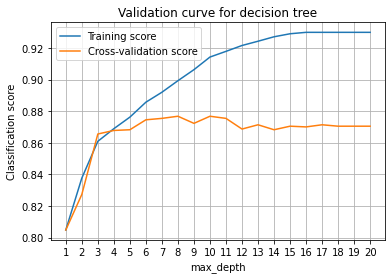

In [47]:
depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)
plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for decision tree')
plt.xlabel('max_depth')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

In [48]:
param_grid = {'min_samples_leaf': np.linspace(s)}

NameError: name 's' is not defined

In [49]:
start_leaf_n = round(0.005 * len(X_train))

In [50]:
start_leaf_n

11

In [51]:
end_leaf_n = round(0.05*len(X_train))

In [52]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

In [53]:
min_samples_leafs


array([0.1, 0.2, 0.3, 0.4, 0.5])

In [54]:
end_leaf_n

111

In [55]:
np.linspace(start_leaf_n,end_leaf_n,20)

array([ 11.        ,  16.26315789,  21.52631579,  26.78947368,
        32.05263158,  37.31578947,  42.57894737,  47.84210526,
        53.10526316,  58.36842105,  63.63157895,  68.89473684,
        74.15789474,  79.42105263,  84.68421053,  89.94736842,
        95.21052632, 100.47368421, 105.73684211, 111.        ])

In [56]:
np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int')


array([ 11,  16,  22,  27,  32,  37,  43,  48,  53,  58,  64,  69,  74,
        79,  85,  90,  95, 100, 106, 111])

In [57]:
min_samples_leafs = np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int') 

In [58]:
max_depth = np.arange(1,20)

In [68]:
param_grid = {'min_samples_leaf': min_samples_leafs, 'max_depth': max_depth}

In [69]:
tree = GridSearchCV(clf_dt, param_grid=param_grid, cv=5)

In [61]:
from sklearn.model_selection import GridSearchCV


In [62]:
tree = GridSearchCV(clf_dt, param_grid=param_grid, cv=5)

In [63]:
t0 = time.time()

NameError: name 'time' is not defined

In [64]:
import time

In [70]:
t0 = time.time()

In [66]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [71]:
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=7, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]

In [72]:
t1=time.time()

In [73]:
train_time[0] = t1-t0

NameError: name 'train_time' is not defined

In [74]:
train_time = t1 - t0

In [75]:
train_time

24.83196496963501

In [76]:
tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 16}

In [77]:
y_pred = tree.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)

In [79]:
accuracy

0.8881401617250674

In [80]:
train_sizes = np.linspace(0.1, 1.0, 5)


In [81]:
_, train_scores, test_scores = learning_curve(clf_dt, X_train, y_train, train_sizes=train_sizes, cv=5)

NameError: name 'learning_curve' is not defined

In [82]:
from sklearn.model_selection import learning_curve

In [83]:
_, train_scores, test_scores = learning_curve(best_clf_dt, X_train, y_train, train_sizes=train_sizes, cv=5)

NameError: name 'best_clf_dt' is not defined

In [84]:
_, train_scores, test_scores = learning_curve(clf_dt, X_train, y_train, train_sizes=train_sizes, cv=5)

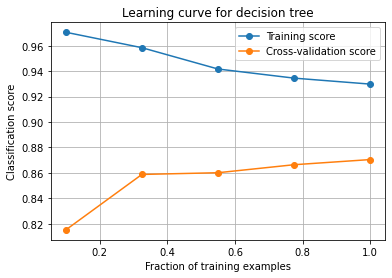

In [85]:
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for decision tree')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()



In [86]:
_, train_scores, test_scores = learning_curve(clf_dt, X, y, train_sizes=train_sizes, cv=5)

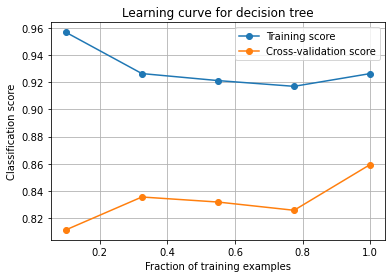

In [87]:
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for decision tree')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()
